<a href="https://www.kaggle.com/code/dsagareeka/pima-indian-diabetes-eda?scriptVersionId=91934147" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes/pima-indians-diabetes.csv


<div style="background-color:#c9c8c8;
            border-radius:10px;
            letter-spacing:0.5px;
            display:fill;
            font-size:110%;
            margin: 5px;">
<p style="padding:5px;">
    
**Context :** This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [2]:
# import library 

import seaborn as sns
import matplotlib.pyplot as plt
import scipy 

# set graph grid
sns.set_style("whitegrid")

## Selection of data

In [3]:
# import data

datadf = pd.read_csv("../input/pima-indians-diabetes/pima-indians-diabetes.csv",header=None)

In [4]:
# col name created
datacol = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

# assign column name

datadf.columns= datacol

In [5]:
# Column names check
datadf.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Column explanation :

1. Pregnancies : No. of times pregnant
2. Gloucose : Plasma gloucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure : Diastolic blood Pressure(mm Hg)
4. SkinThickness : Triceps skin fold thickness (mm)
5. Insulin : 2 hours serum insulin (muU/ml)
6. BMI : Body mass index(weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction : Diabetes pedigree function
8. Age : Age(years)
9. Outcome : Class variable(0 or 1)



In [6]:
# Observe few rows
datadf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# data size
datadf.shape

(768, 9)

**So data has 768 rows and 9 column**

In [8]:
#data information on column type , null and unique count
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Checking Null
datadf.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Na values are Zero**

In [10]:
# Min check of data

datadf.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

**For variable Glucose ,BloodPresure ,Skin Thickness , Insulin, and BMI what we observe min is zero which is not possible** 

# Missing Data Impute


In [11]:
# Precence of Zero in percentage 

datadf[datadf==0.0].count(0)/len(datadf)*100

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

* For Glucose , BloodPressure  BMI  
    * To impute the data will be using statistics location point median
* For SkinThickness & Insulin 
    * Since we have high number of data missing 
    * will check the correlation to check for multicollinearity  
    * then build model to impute the data

In [12]:
# Missing Data impute 
datadf.Glucose.replace(0,datadf.Glucose.median(),inplace=True)
datadf.BloodPressure.replace(0,datadf.BloodPressure.median(),inplace=True)
datadf.BMI.replace(0,datadf.BMI.median(),inplace=True)


<AxesSubplot:>

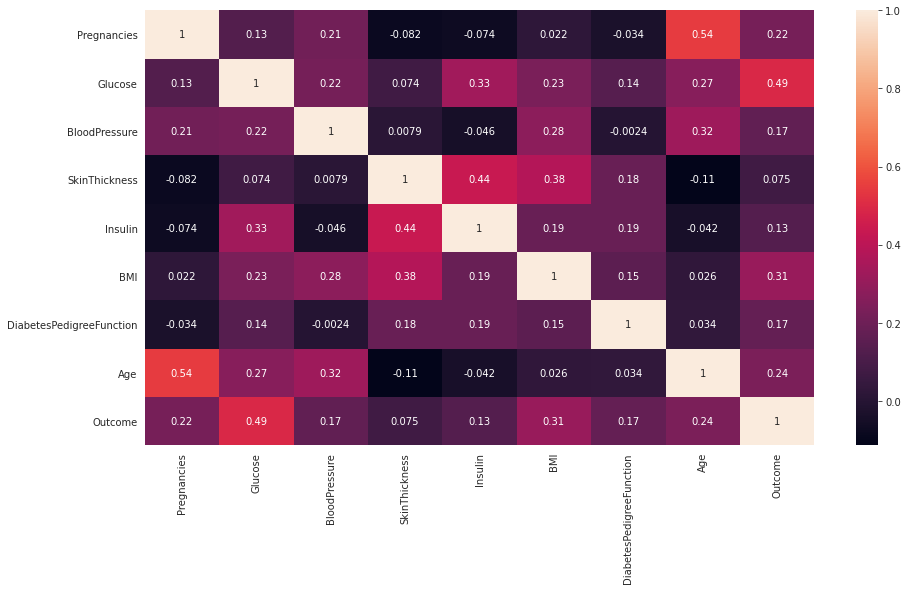

In [13]:
# Coorelation
plt.figure(figsize=(15,8))
sns.heatmap(datadf.corr(),annot=True)

1. Column Insulin & DiabetesPedigressFunction , we donot see any corr > 0.7
2. Will use linear regression model to predict the missing data 
3. Will drop Insulin & DiabetesPedigressFunction for EDA

In [14]:
# drop the column
datadf.drop(['Insulin','SkinThickness'],axis=1,inplace=True)

In [15]:
# Description of data
datadf.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


# Understanding Variables in Data

Based on descriptive our understand of variable :

1. Pregnancies 
 * Missing value - No Value
 * Data type - Discrete 
 * Mean and Median value is fairly close which imply the distribution are not much skewed
 * The mean is greater than the median ,so data is right skewed / positive skewed. 
 * Interquartile range for number of pregnencies in 5 (6 - 1) ie (Q3 - Q1)


2. Glucose 
 *  Missing value - Replace with Median
 *  Data type - Continuous
 *  Mean is 121.65 & Median is 117.00,as Mean > Median , so it indicate it is right skew / positive skewed.
 *  Interquartile range for Glucose in  (140.25 - 99.75) ie (Q3 - Q1)


3. BloodPressure
 *  Missing value - Replace with Median
 *  Data type - Continuous
 *  Mean is 72.38 & Median is 72.00,as Mean > Median , so it indicate it is right skew / positive skewed.
 *  Interquartile range for BloodPressure in  (140.25 - 99.75) ie (Q3 - Q1)

4. BMI
 *  Missing value - Replace with Median
 *  Data type - Continuous
 *  Mean is 32.45 & Median is 32.00,as Mean > Median , so it indicate it is right skew / positive skewed.
 *  Interquartile range for BMI in  (36.00 - 27.00) ie (Q3 - Q1)
 
 
5. DiabetesPedigreeFunction   
 *  Missing value - No Value
 *  Data type - Continuous 
 *  Mean is 0.47 & Median is 0.37,as Mean > Median , so it indicate it is right skew / positive skewed.
 *  Interquartile range for DiabetesPedigreeFunction in  (0.62 - 0.24) ie (Q3 - Q1)
 
6. Age    
 *  Missing value - No Value
 *  Data type - Discrete 
 *  Mean is 33.24 & Median is 29.00,as Mean > Median , so it indicate it is right skew / positive skewed.
 *  Interquartile range for Age in  (41.00 - 24.00) ie (Q3 - Q1)
 
7.  Outcome
 *  Missing Value -  No Value
 *  Data Type - Nominal & Boolean
 *  five point summary is not valid for Nominal data type

# Univariate Analysis of Variable

## Discrete Variable Analysis 
### Pregnancies

Text(0, 0.5, 'Total count')

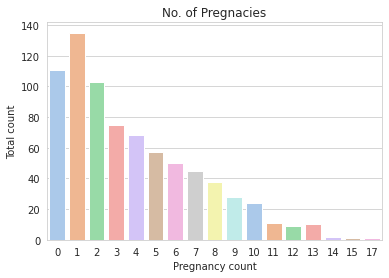

In [16]:
sns.countplot(x=datadf.Pregnancies,
             palette="pastel").set_title('No. of Pregnacies')
plt.xlabel("Pregnancy count")
plt.ylabel("Total count")


### Age

Text(0.5, 1.0, 'Histograph of Age')

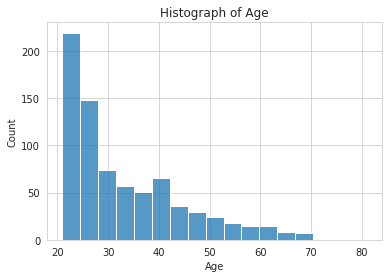

In [17]:
# Histoplot for Age
sns.histplot(x=datadf.Age).set_title("Histograph of Age")

### Outcome

In [18]:
# Outcome count
datadf.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
# Outcome count
datadf.Outcome.value_counts()/len(datadf)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

**Out of 788 data points 65% do not have diabetes**

Text(0.5, 1.0, 'BarPlot on Outcome')

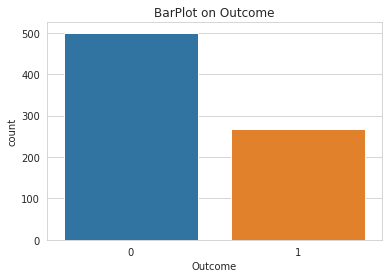

In [20]:
sns.countplot(x=datadf.Outcome).set_title("BarPlot on Outcome")

### Continous Variable Analysis

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

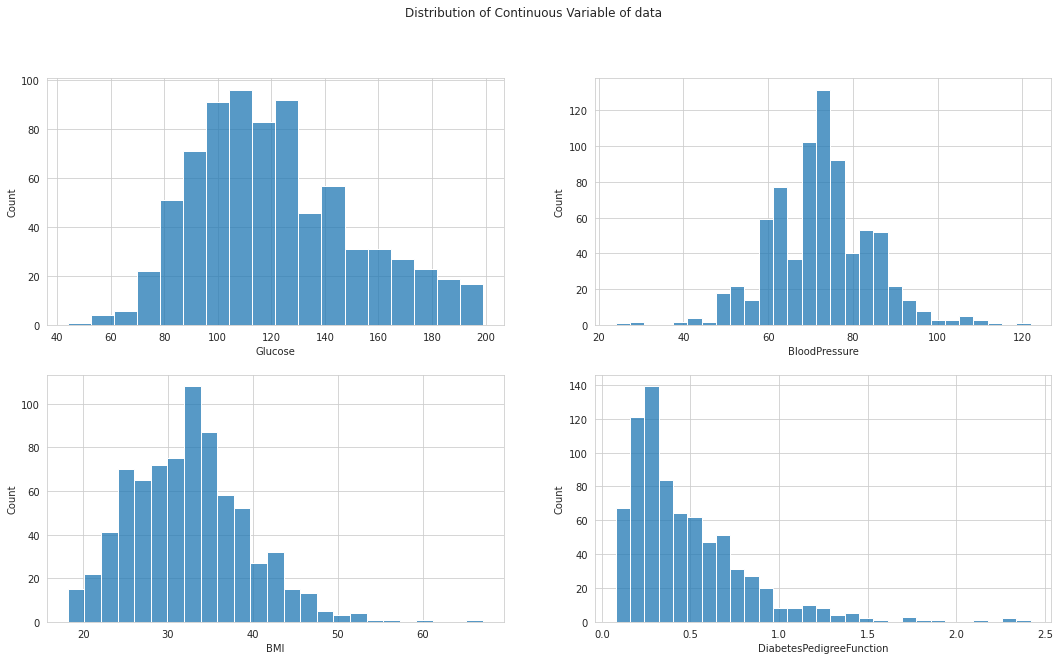

In [21]:
fig, axes = plt.subplots(2, 2, sharey=False,figsize=(18, 10))
  
fig.suptitle('Distribution of Continuous Variable of data')
  
sns.histplot(ax=axes[0, 0], x=datadf.Glucose)
sns.histplot(ax=axes[0, 1], x=datadf.BloodPressure)
sns.histplot(ax=axes[1, 0], x=datadf.BMI)
sns.histplot(ax=axes[1, 1], x=datadf.DiabetesPedigreeFunction)


In [22]:
datadf.loc[:,datadf.columns != 'Outcome'].skew(axis = 0, skipna = True)

Pregnancies                 0.901674
Glucose                     0.535587
BloodPressure               0.141885
BMI                         0.601059
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64

**Skewness of Variables are greater than Zero which indicate they are right /positive skewed. As we observerd looking at histograph and on five point summary**

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

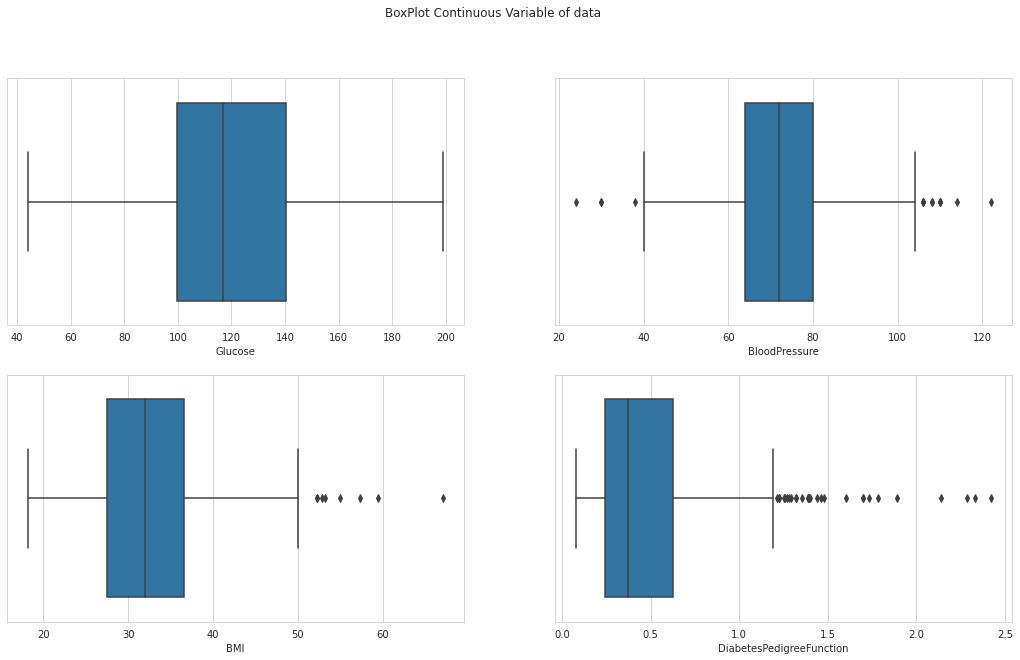

In [23]:
# Box plot 

fig, axes = plt.subplots(2, 2, sharey=False,figsize=(18, 10))
  
fig.suptitle('BoxPlot Continuous Variable of data')
  
sns.boxplot(ax=axes[0, 0], x=datadf.Glucose)
sns.boxplot(ax=axes[0, 1], x=datadf.BloodPressure)
sns.boxplot(ax=axes[1, 0], x=datadf.BMI)
sns.boxplot(ax=axes[1, 1], x=datadf.DiabetesPedigreeFunction)


<div style="background-color:#a89e32;
            border-radius:10px;
            letter-spacing:0.5px;
            display:fill;
            font-size:110%;
            margin: 5px;">
<p style="padding:5px;">
    
  <b>Observation : </b>
    
* Other than Glucose we observe outliers in other variable (Blood Presssure,BMI, Diabetes Pedigree Function)

# Bivariate Analysis

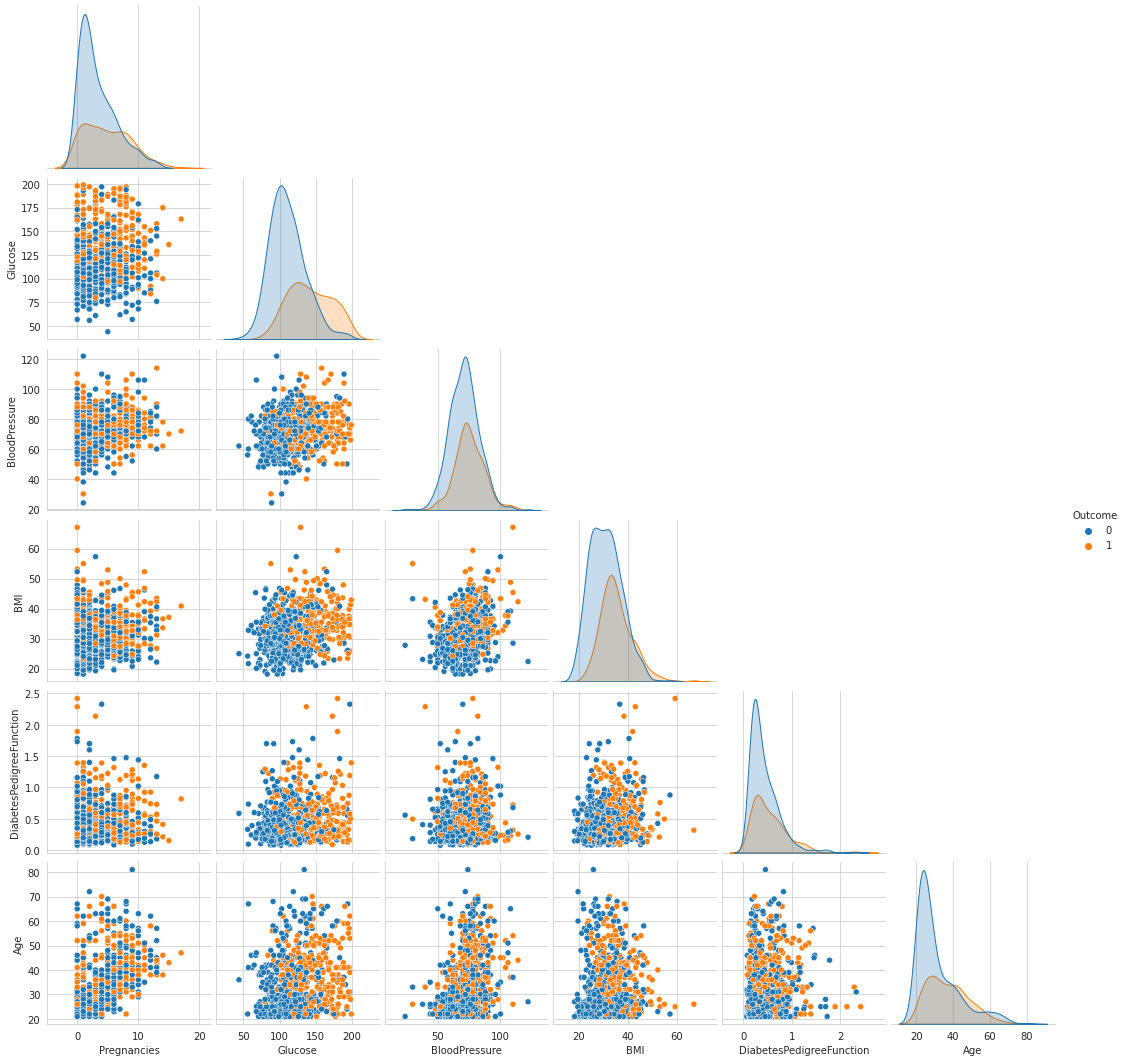

In [24]:
sns.pairplot(datadf,hue="Outcome",corner=True)

## Correlation Plot

<AxesSubplot:>

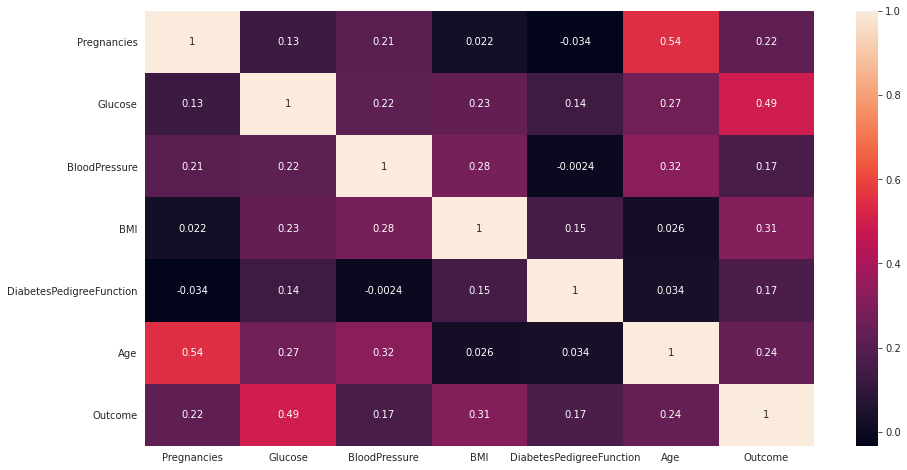

In [25]:
plt.figure(figsize=(15,8))

sns.heatmap(datadf.corr(),annot=True)

### Pregnancy - Outcome

Pregnancies                               
               mean median min max      skew count
Outcome                                           
0          3.298000      2   0  13  1.114105   500
1          4.865672      4   0  17  0.503749   268

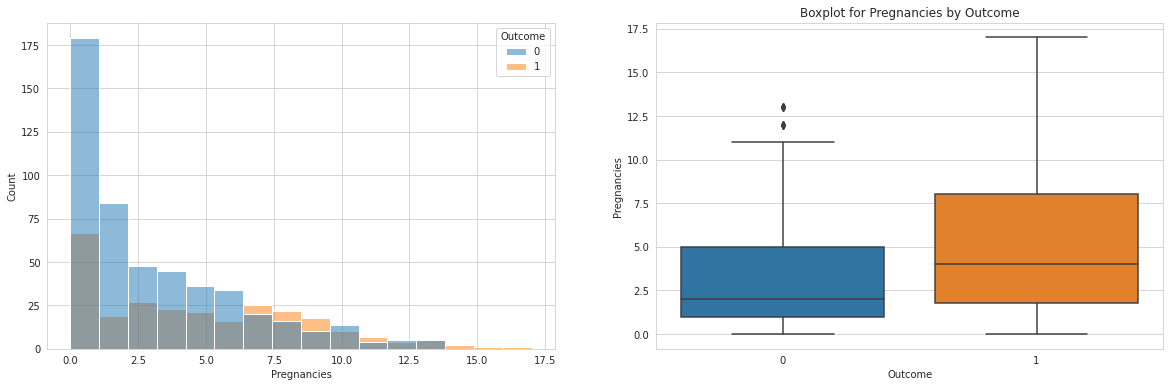

In [26]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="Pregnancies",data = datadf, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=datadf.Outcome, y=datadf.Pregnancies).set_title("Boxplot for Pregnancies by Outcome")


datadf[["Outcome","Pregnancies"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))

<div style="background-color:#a89e32;
            border-radius:10px;
            letter-spacing:0.5px;
            display:fill;
            font-size:110%;
            margin: 5px;">
<p style="padding:5px;">
    
<b>Observation : <b> 
* Women are likely to be diabetic with  higher pregnancies count
* There are few outliner in non diabetic cases 



### Glucose - Outcome

Glucose                                    
               mean median   min    max      skew count
Outcome                                                
0        110.682000  107.5  44.0  197.0  0.651964   500
1        142.130597  140.0  78.0  199.0  0.104803   268

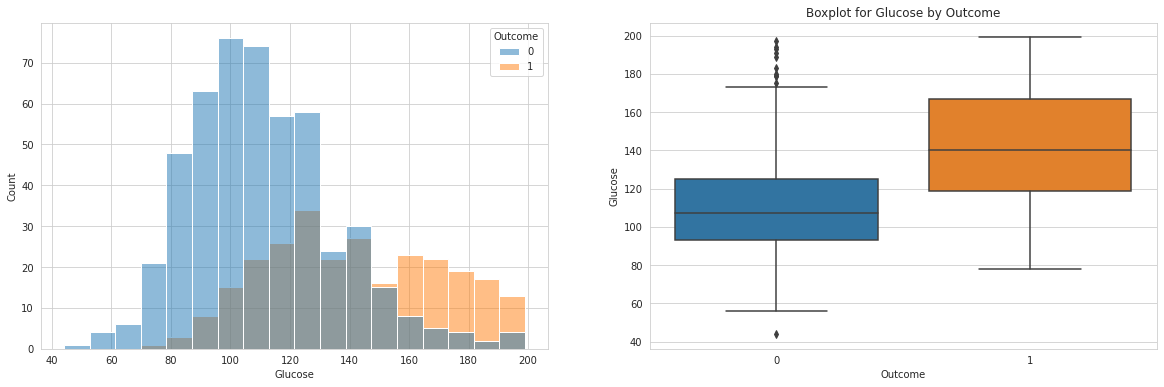

In [27]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="Glucose",data = datadf, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=datadf.Outcome, y=datadf.Glucose).set_title("Boxplot for Glucose by Outcome")


datadf[["Outcome","Glucose"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))


<div style="background-color:#a89e32;
            border-radius:10px;
            letter-spacing:0.5px;
            display:fill;
            font-size:110%;
            margin: 5px;">
<p style="padding:5px;">

 <b>Observation:<b>
* Glucose level are high for diabetic women

### Blood Pressure  - Outcome

BloodPressure                                    
                 mean median   min    max      skew count
Outcome                                                  
0           70.920000   72.0  24.0  122.0  0.153613   500
1           75.123134   74.0  30.0  114.0  0.128154   268

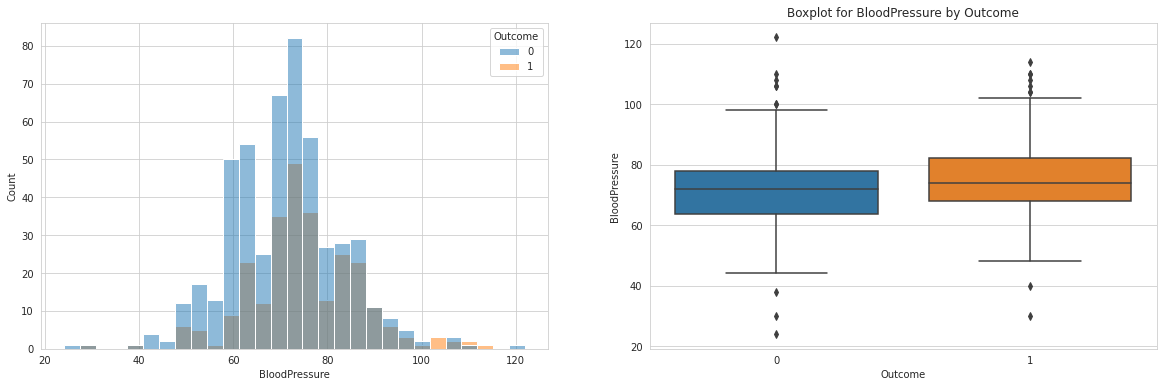

In [28]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="BloodPressure",data = datadf, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=datadf.Outcome, y=datadf.BloodPressure).set_title("Boxplot for BloodPressure by Outcome")


datadf[["Outcome","BloodPressure"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))


<div style="background-color:#a89e32;
            border-radius:10px;
            letter-spacing:0.5px;
            display:fill;
            font-size:110%;
            margin: 5px;">
<p style="padding:5px;">
    
<b>Observation: </b>
* There is less difference of BP level for diabetic & non-diabetic cases. 
</p>
</div>    

### BMI - Outcome

BMI                                   
              mean median   min   max      skew count
Outcome                                              
0        30.880200  30.40  18.2  57.3  0.464242   500
1        35.381343  34.25  22.9  67.1  1.031526   268

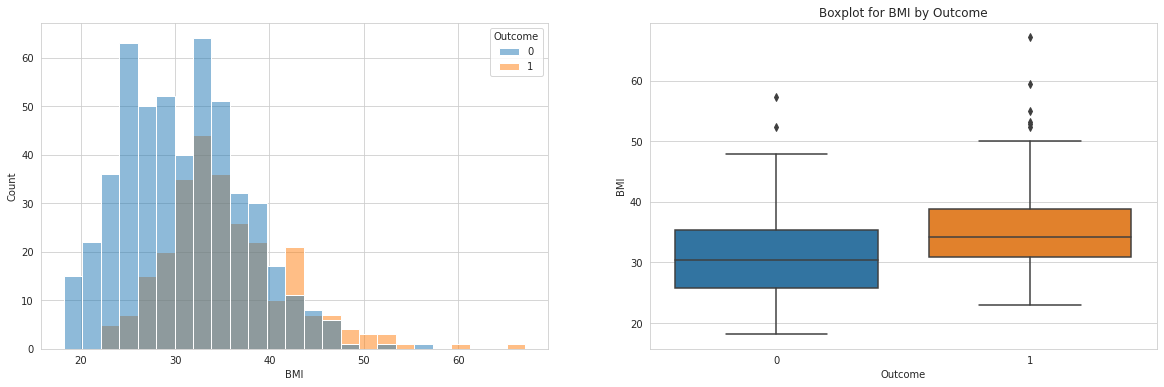

In [29]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="BMI",data = datadf, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=datadf.Outcome, y=datadf.BMI).set_title("Boxplot for BMI by Outcome")


datadf[["Outcome","BMI"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))

Observation : 
* Women with diabetic seems to have high BMI
* Few outlier cases observed in both

### DiabetesPedigreeFunction - Outcome

DiabetesPedigreeFunction                                     
                            mean median    min    max      skew count
Outcome                                                              
0                       0.429734  0.336  0.078  2.329  2.006242   500
1                       0.550500  0.449  0.088  2.420  1.722373   268

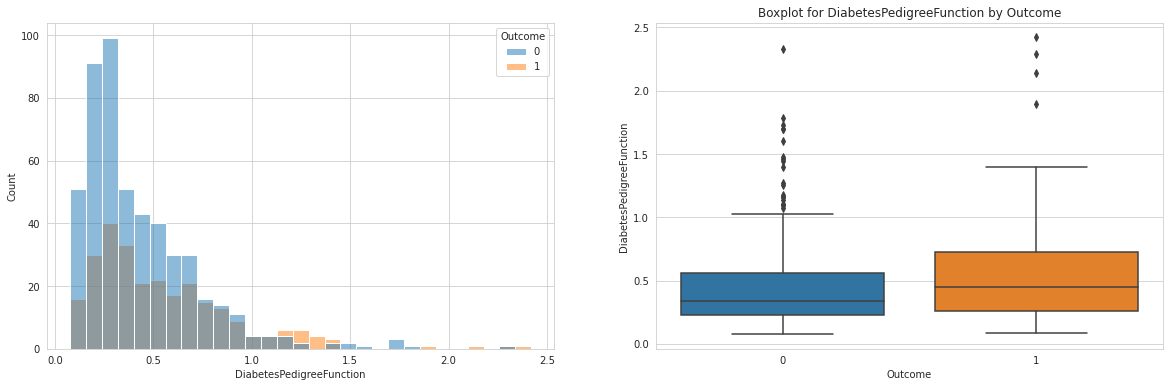

In [30]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="DiabetesPedigreeFunction",data = datadf, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=datadf.Outcome, y=datadf.DiabetesPedigreeFunction).set_title("Boxplot for DiabetesPedigreeFunction by Outcome")


datadf[["Outcome","DiabetesPedigreeFunction"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))



Observation : 
* There are slight difference location value, Diabetes Pedigree Function might effect diabetic 
* Outliners can be seem in both cases (Diabetic and NonDiabetic)

### Age - Outcome

Age                               
              mean median min max      skew count
Outcome                                          
0        31.190000     27  21  81  1.571609   500
1        37.067164     36  21  70  0.581646   268

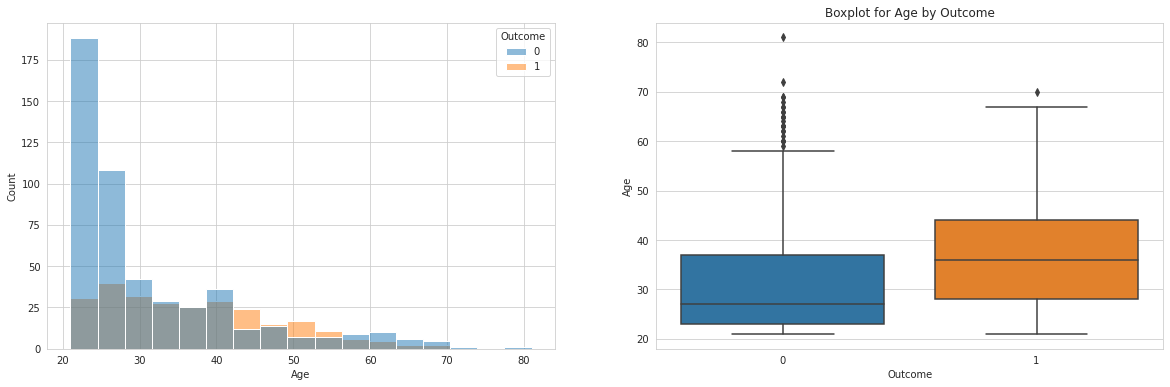

In [31]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="Age",data = datadf, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=datadf.Outcome, y=datadf.Age).set_title("Boxplot for Age by Outcome")


datadf[["Outcome","Age"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))

Observation:
* Diabetic case are more in higher age group with high mean value